##IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
plt.style.use('ggplot')

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## READING DATASET FROM GD

In [ ]:
# Read in data
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/tripadvisor_hotel_review.csv'
df = pd.read_csv(file_path)

# df = pd.read_csv('/content/tripadvisor_hotel_review.csv')
# print(df.shape)
df = df.head(10)
print(df.shape)

Mounted at /content/drive
(10, 3)


## EDA

In [ ]:
df.head()

,ID,Review,Rating
0,1,nice hotel expensive parking got good deal sta...,4
1,2,ok nothing special charge diamond member hilto...,2
2,3,nice rooms not 4* experience hotel monaco seat...,3
3,4,"unique, great stay, wonderful time hotel monac...",5
4,5,"great stay great stay, went seahawk game aweso...",5


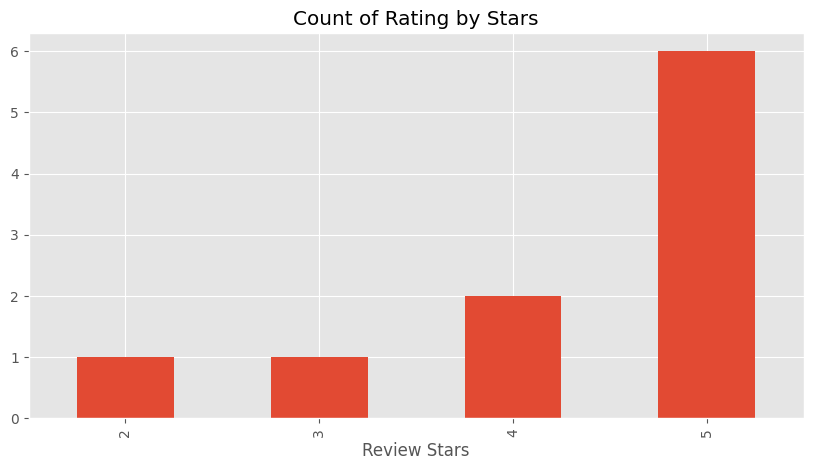

In [ ]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Rating by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
def preprocess_text(text):

    tokens = word_tokenize(text)

    # Removing the stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    return words


In [ ]:
text="nice      parking ,    food was not good    "
sen=preprocess_text(text);
print(sen);

['nice', 'parking', 'food', 'good']


In [ ]:
df['processed_text'] = df['Review'].apply(preprocess_text)

In [ ]:
word_list = [word for sublist in df['processed_text'] for word in sublist]
word_freq = Counter(word_list)

print(word_list,'\n')
print(word_freq)


['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'noisy', 'neighbors', 'aveda', 'bath', 'products', 'nice', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'pay', 'parking', 'night', 'ok', 'nothing', 'special', 'charge', 'diamond', 'member', 'hilton', 'decided', 'chain', 'shot', 'anniversary', 'seattle', 'start', 'booked', 'suite', 'paid', 'extra', 'website', 'description', 'suite', 'bedroom', 'bathroom',

## Selecting 20 most frequent words

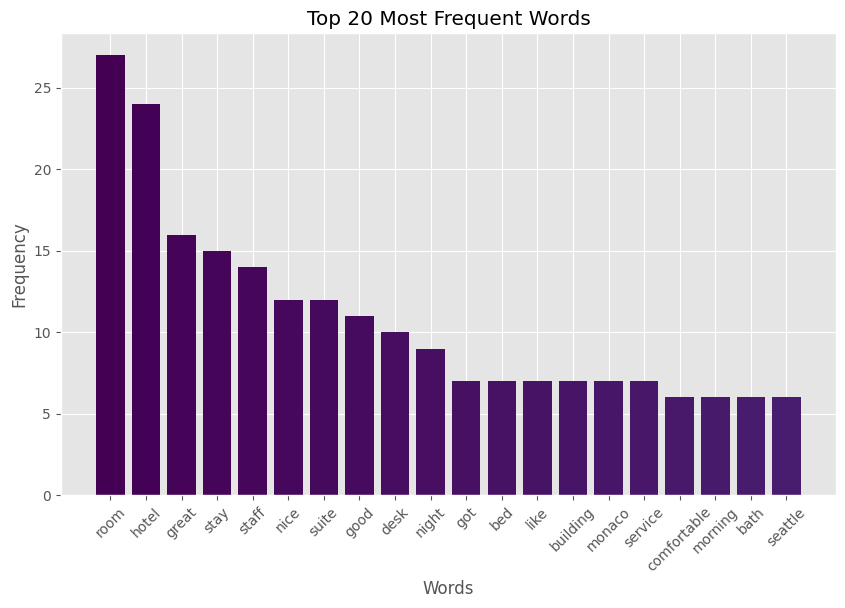

In [ ]:
top_words = word_freq.most_common(20)


words, frequencies = zip(*top_words)


plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color=plt.cm.viridis(range(len(words))))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.show()

## BASIC NLTK

In [ ]:
example = "the hotel is good , food is awesome, service is bad"
print(example)

the hotel is good , food is awesome, service is bad


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['the', 'hotel', 'is', 'good', ',', 'food', 'is', 'awesome', ',', 'service']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]



[('the', 'DT'),
 ('hotel', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('food', 'NN'),
 ('is', 'VBZ'),
 ('awesome', 'JJ'),
 (',', ','),
 ('service', 'NN')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  the/DT
  hotel/NN
  is/VBZ
  good/JJ
  ,/,
  food/NN
  is/VBZ
  awesome/JJ
  ,/,
  service/NN
  is/VBZ
  bad/JJ)


## VADER SENTIMENT SCORING

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('Battery was so good')


{'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.5777}

In [ ]:
sia.polarity_scores('Battery drains faster')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.2, 'neu': 0.4, 'pos': 0.4, 'compound': 0.5423}

## Changing the dataset(ADDING ID)

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')

# Add an ID column
df.insert(0, 'ID', range(1, len(df) + 1))

# Write the DataFrame back to a CSV file
df.to_csv('output_file_with_id.csv', index=False)

print("ID column added and CSV file saved successfully.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/tripadvisor_hotel_reviews.csv'

## RUNNING VADER ON DATASET

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,ID,neg,neu,pos,compound,Review,Rating,processed_text
0,1,0.072,0.643,0.285,0.9747,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,2,0.110,0.701,0.189,0.9787,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,3,0.081,0.700,0.219,0.9889,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, experience, hotel, monaco, seatt..."
3,4,0.060,0.555,0.385,0.9912,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ..."
4,5,0.135,0.643,0.221,0.9797,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game..."


## PLOTTING THE VADER RESULTS

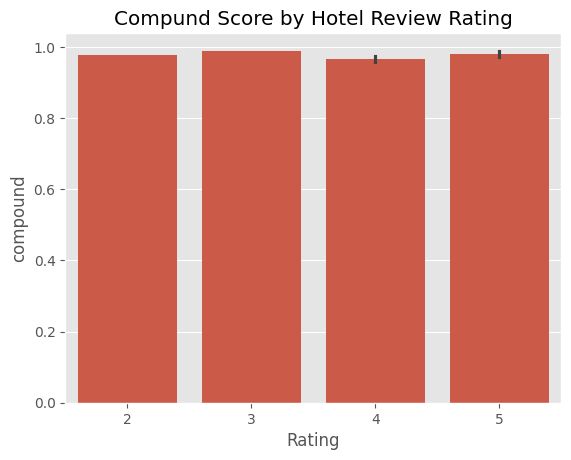

In [ ]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund Score by Hotel Review Rating')
plt.show()

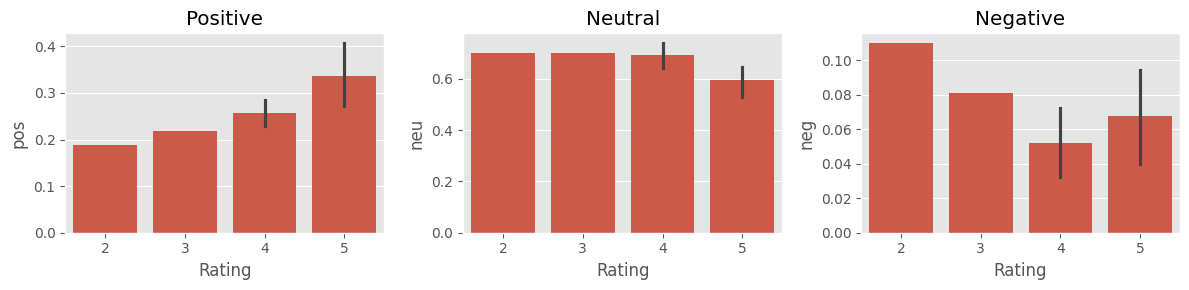

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## ROBERTA PRETRAINED MODEL

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

the hotel is good , food is awesome, service is bad


{'neg': 0.2, 'neu': 0.4, 'pos': 0.4, 'compound': 0.5423}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

NameError: name 'tokenizer' is not defined

## ASPECT CLASSIFICATION(STATIC)

In [ ]:
def aspect_classifier(text):
    aspects = {
        'parking':[
            "parking",
            "car parking",
            "parking lot",
            "parking space",
            "parking area",
            "parking garage",
            "parking spot",
            "vehicle parking",
            "automobile parking",
            "vehicle storage",
            "parking facility"
        ],

        'food':[
            "food",
            "cuisine",
            "restaurant",
            "edibles",
            "provisions",
            "diet",
            "meals"
        ],

        'room': [
            'apartments',
            'rooms',
            'room',
            'bed',
            'view',
            'pillows',
            'bath',
            'bedrooms',
            'bedroom',
            'apartment'
        ],

        'staff': [
            'staff',
            'service',
            'employees',
            'workers'
        ],

        'location': [
            'location',
            'shopping',
            'walking distance',
            'venue',
            'address',
            'site',
            'buildings'
        ]
    }

    category_sentences = {category: [] for category in aspects}

    sentences = text.replace(',', '.').split('.')

    for sentence in sentences:
        for category, keywords in aspects.items():
            if any(keyword in sentence.lower() for keyword in keywords):
                category_sentences[category].append(sentence)

    for category, sentences in category_sentences.items():
      category_sentences[category] = '. '.join(sentences)

    parking_review = ""
    food_review = ""
    room_review = ""
    staff_review = ""
    location_review = ""

    for category, text in category_sentences.items():
        if category == 'parking':
            parking_review = text
        elif category == 'food':
            food_review = text
        elif category == 'room':
            room_review = text
        elif category == 'staff':
            staff_review = text
        elif category == 'location':
            location_review = text

    # print("parking_review:")
    # print(parking_review, '\n')

    # print("food_review:")
    # print(food_review, '\n')

    # print("room_review:")
    # print(room_review, '\n')

    # print("staff_review:")
    # print(staff_review, '\n')

    # print("location_review:")
    # print(location_review, '\n')

    return parking_review, food_review, room_review, staff_review, location_review

# Example usage
# review = "parking was safe,rooms were clean,service was not impressive, staff was rude"
# aspect_classifier(review)


## RUNNING ROBERTA ON WHOLE DATASET AND CALCULATION OF INDIVIDUAL AND AVERAGE POLARITY SCORES(NOT DYNAMIC)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
total_pos_parking=0
total_neg_parking=0
total_neu_parking=0

total_pos_food=0
total_neg_food=0
total_neu_food=0

total_pos_staff=0
total_neg_staff=0
total_neu_staff=0

total_pos_room=0
total_neg_room=0
total_neu_room=0

total_pos_location=0
total_neg_location=0
total_neu_location=0

n_parking=0
n_food=0
n_room=0
n_staff=0
n_location=0

roberta_scores_list_parking = []
roberta_scores_list_food = []
roberta_scores_list_room = []
roberta_scores_list_staff = []
roberta_scores_list_location = []


res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['ID']

        parking_review, food_review, room_review, staff_review, location_review = aspect_classifier(text)

        print('\n')
        print("Parking Review:")
        print(parking_review, '\n')
        roberta_result = polarity_scores_roberta(parking_review)

        roberta_scores_list_parking.append(roberta_result)

        print(roberta_result)
        if(parking_review!=""):
          n_parking+=1
          total_pos_parking+=roberta_result['roberta_pos']
          total_neg_parking+=roberta_result['roberta_neg']
          total_neu_parking+=roberta_result['roberta_neu']

        print('\n')
        print("Food Review:")
        print(food_review, '\n')
        roberta_result = polarity_scores_roberta(food_review)
        roberta_scores_list_food.append(roberta_result)
        print(roberta_result)

        if(food_review!=""):
          n_food+=1
          total_pos_food+=roberta_result['roberta_pos']
          total_neg_food+=roberta_result['roberta_neg']
          total_neu_food+=roberta_result['roberta_neu']

        print('\n')
        print("Room Review:")
        print(room_review, '\n')
        roberta_result = polarity_scores_roberta(room_review)
        roberta_scores_list_room.append(roberta_result)
        print(roberta_result)

        if(room_review!=""):
          n_room+=1
          total_pos_room+=roberta_result['roberta_pos']
          total_neg_room+=roberta_result['roberta_neg']
          total_neu_room+=roberta_result['roberta_neu']

        print('\n')
        print("Staff Review:")
        print(staff_review, '\n')
        roberta_result = polarity_scores_roberta(staff_review)
        roberta_scores_list_staff.append(roberta_result)
        print(roberta_result)

        if(staff_review!=""):
          n_staff+=1
          total_pos_staff+=roberta_result['roberta_pos']
          total_neg_staff+=roberta_result['roberta_neg']
          total_neu_staff+=roberta_result['roberta_neu']

        print('\n')
        print("Location Review:")
        print(location_review, '\n')
        roberta_result = polarity_scores_roberta(location_review)
        roberta_scores_list_location.append(roberta_result)
        print(roberta_result)

        if(location_review!=""):
          n_location+=1
          total_pos_location+=roberta_result['roberta_pos']
          total_neg_location+=roberta_result['roberta_neg']
          total_neu_location+=roberta_result['roberta_neu']


        # print(lowercase_words,'\n')
        # print(text,'\n')
        # print(type(text))


        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)

        print("\nWhole Review Analysis:")
        print(roberta_result)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


roberta_scores_array_parking = np.array([[row['roberta_neg'], row['roberta_neu'], row['roberta_pos']] for row in roberta_scores_list_parking])
roberta_scores_array_room = np.array([[row['roberta_neg'], row['roberta_neu'], row['roberta_pos']] for row in roberta_scores_list_room])
roberta_scores_array_staff = np.array([[row['roberta_neg'], row['roberta_neu'], row['roberta_pos']] for row in roberta_scores_list_staff])
roberta_scores_array_location = np.array([[row['roberta_neg'], row['roberta_neu'], row['roberta_pos']] for row in roberta_scores_list_location])
roberta_scores_array_food = np.array([[row['roberta_neg'], row['roberta_neu'], row['roberta_pos']] for row in roberta_scores_list_food])




print('\n')
print(roberta_scores_array_parking)
print('\n')

print('\n')
print("total_n_parking:")
print(n_parking)

if(n_parking==0):
  print('\n')
  print("total_pos_parking:")
  print(total_pos_parking)
  print('\n')
  print("total_neg_parking:")
  print(total_neg_parking)
  print('\n')
  print("total_neu_parking:")
  print(total_neu_parking)
  print('\n')

else:
  print('\n')
  print("total_pos_parking:")
  print(total_pos_parking/n_parking)
  print('\n')
  print("total_neg_parking:")
  print(total_neg_parking/n_parking)
  print('\n')
  print("total_neu_parking:")
  print(total_neu_parking/n_parking)
  print('\n')


print('\n')
print(roberta_scores_array_food)
print('\n')

print("total_n_food:")
print(n_food)

if(n_food==0):
  print('\n')
  print("total_pos_food:")
  print(total_pos_food)
  print('\n')
  print("total_neg_food:")
  print(total_neg_food)
  print('\n')
  print("total_neu_food:")
  print(total_neu_food)
  print('\n')

else:
  print('\n')
  print("total_pos_food:")
  print(total_pos_food/n_food)
  print('\n')
  print("total_neg_food:")
  print(total_neg_food/n_food)
  print('\n')
  print("total_neu_food:")
  print(total_neu_food/n_food)
  print('\n')



print('\n')
print(roberta_scores_array_staff)
print('\n')

print("total_n_staff:")
print(n_staff)

if(n_staff==0):
  print('\n')
  print("total_pos_staff:")
  print(total_pos_staff)
  print('\n')
  print("total_neg_staff:")
  print(total_neg_staff)
  print('\n')
  print("total_neu_staff:")
  print(total_neu_staff)
  print('\n')

else:
  print('\n')
  print("total_pos_staff:")
  print(total_pos_staff/n_staff)
  print('\n')
  print("total_neg_staff:")
  print(total_neg_staff/n_staff)
  print('\n')
  print("total_neu_staff:")
  print(total_neu_staff/n_staff)
  print('\n')




print('\n')
print(roberta_scores_array_room)
print('\n')

print("total_n_room:")
print(n_room)

if(n_room==0):
  print('\n')
  print("total_pos_room:")
  print(total_pos_room)
  print('\n')
  print("total_neg_room:")
  print(total_neg_room)
  print('\n')
  print("total_neu_room:")
  print(total_neu_room)
  print('\n')

else:
  print('\n')
  print("total_pos_room:")
  print(total_pos_room/n_room)
  print('\n')
  print("total_neg_room:")
  print(total_neg_room/n_room)
  print('\n')
  print("total_neu_room:")
  print(total_neu_room/n_room)
  print('\n')


print('\n')
print(roberta_scores_array_location)
print('\n')

print("total_n_location:")
print(n_location)

if(n_location==0):
  print('\n')
  print("total_pos_location:")
  print(total_pos_location)
  print('\n')
  print("total_neg_location:")
  print(total_neg_location)
  print('\n')
  print("total_neu_location:")
  print(total_neu_location)
  print('\n')

else:
  print('\n')
  print("total_pos_location:")
  print(total_pos_location/n_location)
  print('\n')
  print("total_neg_location:")
  print(total_neg_location/n_location)
  print('\n')
  print("total_neu_location:")
  print(total_neu_location/n_location)
  print('\n')





  0%|          | 0/1000 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
 expected ritz service outstanding greeting valet concierge club.  food club services beautifully presented ask did n't find.  turn services provided good attention filling ice buckets replacing towels prepping coffee area 

{'roberta_neg': 0.01807926, 'roberta_neu': 0.12757029, 'roberta_pos': 0.85435045}


Location Review:
 

{'roberta_neg': 0.2582943, 'roberta_neu': 0.4512724, 'roberta_pos': 0.29043332}

Whole Review Analysis:
{'roberta_neg': 0.005625952, 'roberta_neu': 0.06598649, 'roberta_pos': 0.9283875}


Parking Review:
 

{'roberta_neg': 0.2582943, 'roberta_neu': 0.4512724, 'roberta_pos': 0.29043332}


Food Review:
 conference breakfast provided daily ate restaurant nor ordered room service 

{'roberta_neg': 0.124965936, 'roberta_neu': 0.82147825, 'roberta_pos': 0.053555846}


Room Review:
 read unfavorable reviews ritz phoenix went expectations low.  conference breakfast provided daily ate restaurant nor ordered room service 


## DYNAMIC ASPECT CLASSIFICATION(USING NTLK AND FREQUENCY)

In [ ]:
print(words,'\n')
print(frequencies,'\n')

tagged = nltk.pos_tag(words)
print(tagged,'\n')
nouns=[]
for word,typ in tagged:
  if typ=='NN':
    nouns.append(word)

if(len(nouns)>5):
  nouns=nouns[:5]
print(nouns,'\n')


#TRIED TO USE NTLK
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(synonyms)

# word = nouns[3]
# synonyms = get_synonyms(word)
# print("Synonyms of", word + ":", synonyms)

def aspect_classifier_dynamic(text):
    aspects = {}

    # print(words,'\n')
    # print(frequencies,'\n')

    # tagged = nltk.pos_tag(words)
    # print(tagged,'\n')
    # nouns=[]
    # for word,typ in tagged:
    #   if typ=='NN':
    #     nouns.append(word)

    # if(len(nouns)>5):
    #   nouns=nouns[:5]
    # print(nouns,'\n')

    for value in nouns:
      synonyms = get_synonyms(value)
      aspects[value]=synonyms

    print(aspects)

    category_sentences = {category: [] for category in aspects}

    sentences = text.replace(',', '.').split('.')

    for sentence in sentences:
        for category, keywords in aspects.items():
            if any(keyword in sentence.lower() for keyword in keywords):
                category_sentences[category].append(sentence)

    for category, sentences in category_sentences.items():
      category_sentences[category] = '. '.join(sentences)

    a1_review = ""
    a2_review = ""
    a3_review = ""
    a4_review = ""
    a5_review = ""

    for category, text in category_sentences.items():
        if category == nouns[0]:
            a1_review = text
        elif category == nouns[1]:
            a2_review = text
        elif category == nouns[2]:
            a3_review = text
        elif category == nouns[3]:
            a4_review = text
        elif category == nouns[4]:
            a5_review = text

    # print("a1_review:")
    # print(a1_review, '\n')

    # print("a2_review:")
    # print(a2_review, '\n')

    # print("a3_review:")
    # print(a3_review, '\n')

    # print("a4_review:")
    # print(a4_review, '\n')

    # print("a5_review:")
    # print(a5_review, '\n')

    return a1_review, a2_review, a3_review, a4_review, a5_review

# Example usage
# review = "rooms were clean,hotel was good overall,i enjoyed my stay"
# aspect_classifier_dynamic(review)

('hotel', 'room', 'great', 'stay', 'staff', 'location', 'nice', 'rooms', 'good', 'place', 'night', 'stayed', 'service', 'seattle', 'like', 'clean', 'small', 'desk', 'bed', 'time') 

(2267, 1808, 917, 892, 684, 586, 583, 583, 552, 472, 446, 440, 430, 379, 372, 364, 356, 352, 320, 319) 

[('hotel', 'NN'), ('room', 'NN'), ('great', 'JJ'), ('stay', 'JJ'), ('staff', 'NN'), ('location', 'NN'), ('nice', 'NN'), ('rooms', 'NNS'), ('good', 'JJ'), ('place', 'NN'), ('night', 'NN'), ('stayed', 'VBN'), ('service', 'NN'), ('seattle', 'NNS'), ('like', 'IN'), ('clean', 'JJ'), ('small', 'JJ'), ('desk', 'NN'), ('bed', 'NN'), ('time', 'NN')] 

['hotel', 'room', 'staff', 'location', 'nice'] 



## RUNNING ROBERTA ON WHOLE DATASET AND CALCULATION OF INDIVIDUAL AND AVERAGE POLARITY SCORES(DYNAMIC)

In [ ]:
total_pos_a1=0
total_neg_a1=0
total_neu_a1=0

total_pos_a2=0
total_neg_a2=0
total_neu_a2=0

total_pos_a3=0
total_neg_a3=0
total_neu_a3=0

total_pos_a4=0
total_neg_a4=0
total_neu_a4=0

total_pos_a5=0
total_neg_a5=0
total_neu_a5=0



res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['ID']

        a1_review, a2_review, a4_review, a3_review, a5_review = aspect_classifier_dynamic(text)

        print('\n')
        print(nouns[0]," Review:")
        print(a1_review, '\n')
        roberta_result = polarity_scores_roberta(a1_review)

        print('\n')
        print(roberta_result)
        total_pos_a1+=roberta_result['roberta_pos']
        total_neg_a1+=roberta_result['roberta_neg']
        total_neu_a1+=roberta_result['roberta_neu']

        print('\n')
        print(nouns[1]," Review:")
        print(a2_review, '\n')
        roberta_result = polarity_scores_roberta(a2_review)
        print(roberta_result)
        total_pos_a2+=roberta_result['roberta_pos']
        total_neg_a2+=roberta_result['roberta_neg']
        total_neu_a2+=roberta_result['roberta_neu']

        print('\n')
        print(nouns[2]," Review:")
        print(a4_review, '\n')
        roberta_result = polarity_scores_roberta(a4_review)
        print(roberta_result)
        total_pos_a4+=roberta_result['roberta_pos']
        total_neg_a4+=roberta_result['roberta_neg']
        total_neu_a4+=roberta_result['roberta_neu']

        print('\n')
        print(nouns[3]," Review:")
        print(a3_review, '\n')
        roberta_result = polarity_scores_roberta(a3_review)
        print(roberta_result)
        total_pos_a3+=roberta_result['roberta_pos']
        total_neg_a3+=roberta_result['roberta_neg']
        total_neu_a3+=roberta_result['roberta_neu']

        print('\n')
        print(nouns[4]," Review:")
        print(a5_review, '\n')
        roberta_result = polarity_scores_roberta(a5_review)
        print(roberta_result)
        total_pos_a5+=roberta_result['roberta_pos']
        total_neg_a5+=roberta_result['roberta_neg']
        total_neu_a5+=roberta_result['roberta_neu']


        # print(lowercase_words,'\n')
        # print(text,'\n')
        # print(type(text))


        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)

        print("\nWhole Review Analysis:")
        print(roberta_result)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

print('\n')
print("total_pos_a1:")
print(total_pos_a1)
print('\n')
print("total_neg_a1:")
print(total_neg_a1)
print('\n')
print("total_neu_a1:")
print(total_neu_a1)
print('\n')


print("total_pos_a2:")
print(total_pos_a2)
print('\n')
print("total_neg_a2:")
print(total_neg_a2)
print('\n')
print("total_neu_a2:")
print(total_neu_a2)
print('\n')


print("total_pos_a3:")
print(total_pos_a3)
print('\n')
print("total_neg_a3:")
print(total_neg_a3)
print('\n')
print("total_neu_a3:")
print(total_neu_a3)
print('\n')

print("total_pos_a4:")
print(total_pos_a4)
print('\n')
print("total_neg_a4:")
print(total_neg_a4)
print('\n')
print("total_neu_a4:")
print(total_neu_a4)
print('\n')


print("total_pos_a5:")
print(total_pos_a5)
print('\n')
print("total_neg_a5:")
print(total_neg_a5)
print('\n')
print("total_neu_a5:")
print(total_neu_a5)
print('\n')


  0%|          | 0/10 [00:00<?, ?it/s]

{'room': ['room', 'room', 'way', 'elbow_room', 'room', 'room', 'board', 'room'], 'hotel': ['hotel'], 'staff': ['staff', 'staff', 'staff', 'faculty', 'staff', 'staff', 'staff', 'stave', 'staff', 'staff'], 'desk': ['desk'], 'night': ['night', 'nighttime', 'dark', 'night', 'night', 'night', 'night', 'night', 'night', 'Nox', 'Night']}


room  Review:
 little disappointed non-existent view room room clean nice size.  not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway 



{'roberta_neg': 0.80137336, 'roberta_neu': 0.17169937, 'roberta_pos': 0.0269273}


hotel  Review:
nice hotel expensive parking got good deal stay hotel anniversary 

{'roberta_neg': 0.0024822804, 'roberta_neu': 0.031374738, 'roberta_pos': 0.966143}


staff  Review:
 

{'roberta_neg': 0.2582943, 'roberta_neu': 0.4512724, 'roberta_pos': 0.29043332}


desk  Review:
 

{'roberta_neg': 0.2582943, 'roberta_neu': 0.4512724, 'roberta_pos': 0.29043332}


night  Review:
 no

## VADER V/S ROBERTA IN SENTIMENT ANALYSIS(COMPLETE STATEMENTS)

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['ID']
        words = nltk.word_tokenize(text)
        lowercase_words = [word.lower() for word in words]

        print(lowercase_words,'\n')
        print(text,'\n')
        print(type(text))


        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        print(roberta_result)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1 [00:00<?, ?it/s]

['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', ',', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'did', 'valet', 'parking', ',', 'check', 'quick', 'easy', ',', 'little', 'disappointed', 'non-existent', 'view', 'room', 'room', 'clean', 'nice', 'size', ',', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', ',', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', ',', 'maybe', 'just', 'noisy', 'neighbors', ',', 'aveda', 'bath', 'products', 'nice', ',', 'did', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', ',', 'location', 'great', 'walking', 'distance', 'shopping', ',', 'overall', 'nice', 'experience', 'having', 'pay', '40', 'parking', 'night', ','] 

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice 

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review', 'Rating'],
      dtype='object')

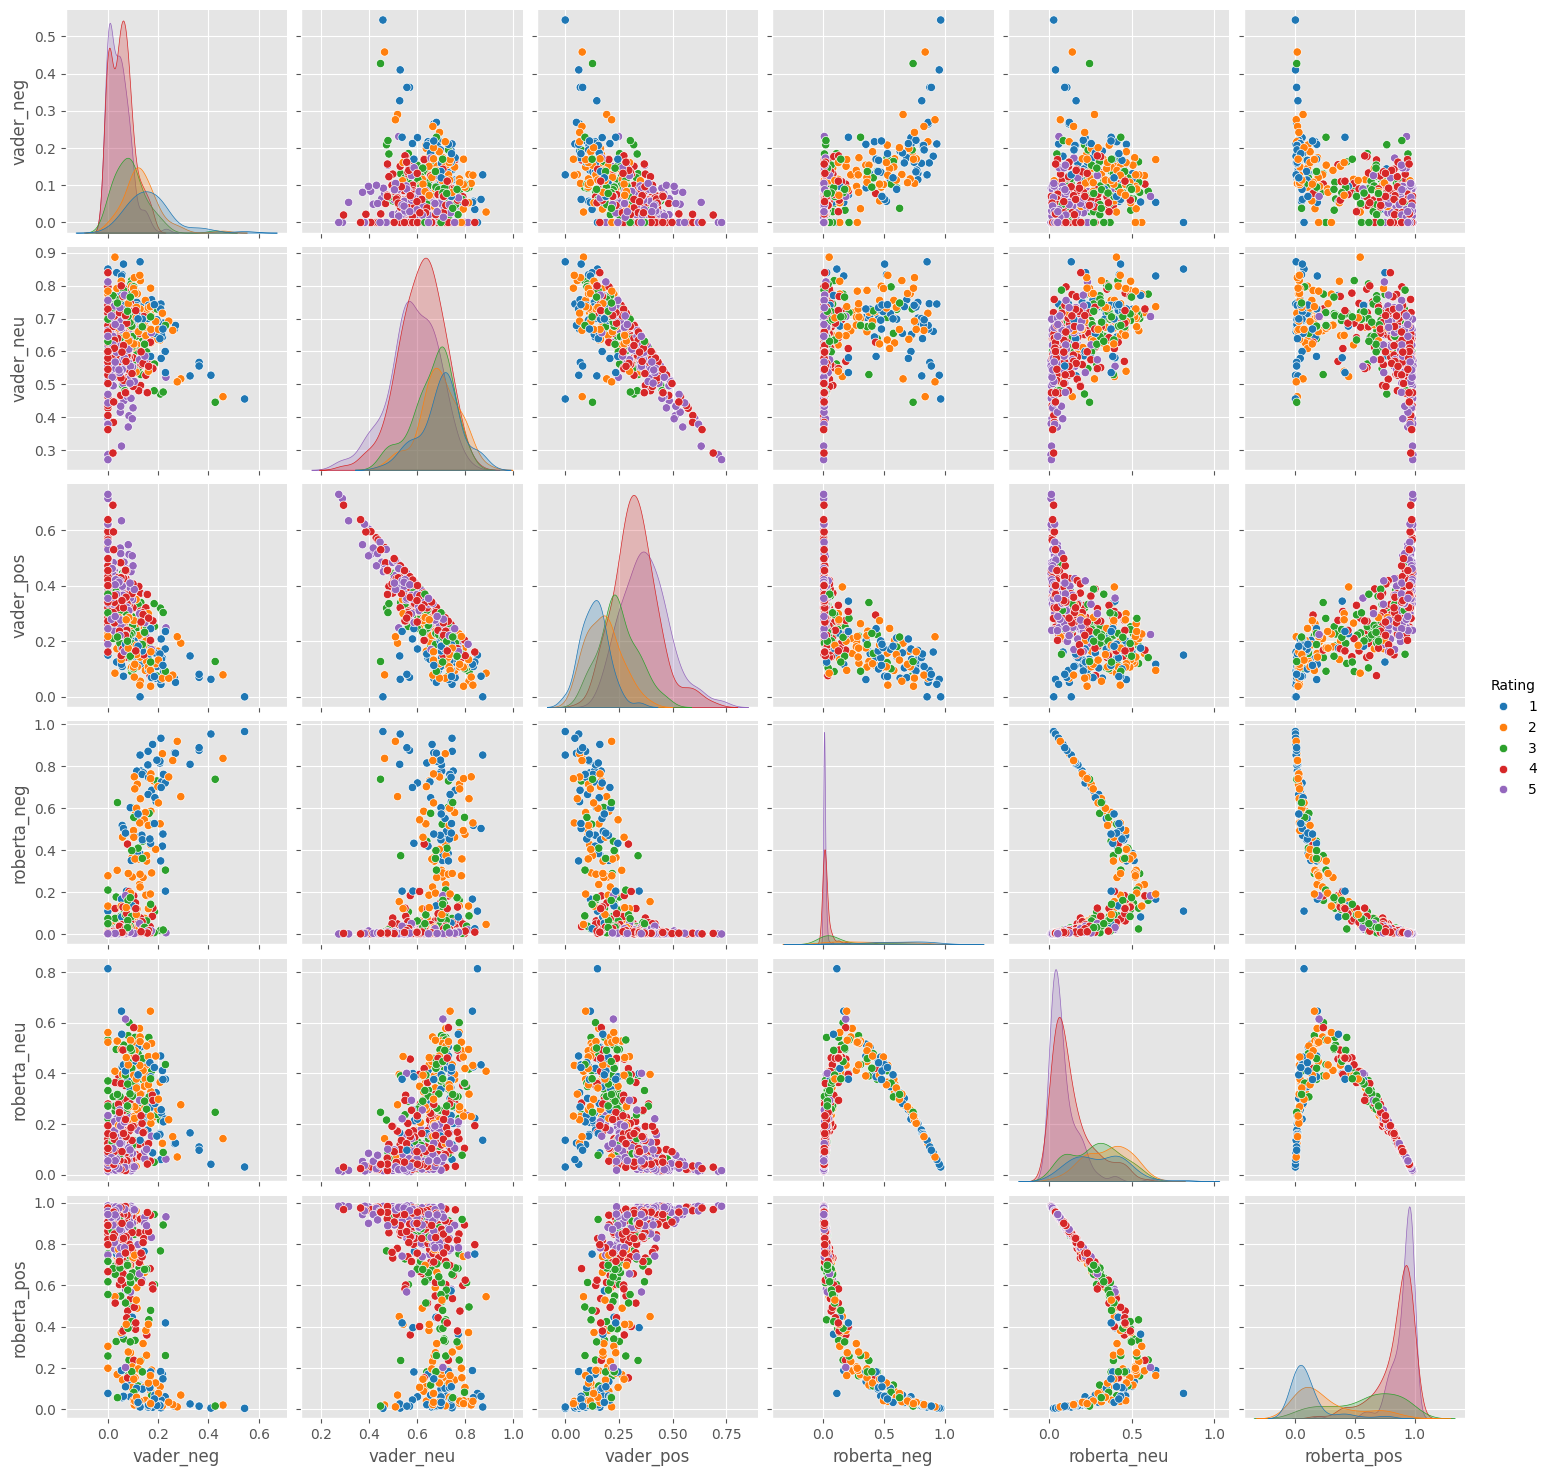

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

## REVIEWING SOME ANOMALY

Positive 1 star rating

In [ ]:
results_df.query('Rating ==  ') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'stay away dirty rooms stayed far better places seattle, room size prison cell window facing outside wall, quiet showered flushed toilet, plus seattle best coffee lobby right downtown, hotel limo expect pay 30 yellow cab, hotel staff helpful friendly,  '

In [ ]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

"stay plenty nice hotels seattle, not, terrible stay bellman lost luggage phones did n't work dirty sheets letter manager answered acknowledged, better staying,  "

Negative 5 star rating

In [ ]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

"max-imum enjoyment, co-worker stayed hotel max semi-business trip decided share room save company dollars mindful watch company money, max high end price wise typically pay traveling pleasure competetive downtown seattle hotels priceline spoiled years 150 night like splurge, called ahead confirm late check double check set reserved room 2 beds a-ok. arrival greeted attentive desk clerk went looking bottled water, experiencing smooth check soon way 8th floor room, impressions room far larger expected, course seen room complaints regarding size norm reviews hotel, wardrobe plenty spacious taken particular note mentioned hang clothes angle room wardrobe question large clothes, downfall room non-smoking non-smoking floor clearly home guests realize cigarette smoke smells lingers, probably adjusted co-worker particularly sensative problem, attempted switch rooms informed hotel booked wait morning, effort rid room reek opened windows helped bit, beds laden white comforters/duvets loads pill

In [ ]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

"great seattle location great downtown hotel, parking problem, read reviews hotel parking 35 overnite, parked block away convention center 18.short 6 block walk pike place market, n't miss excellent dinner hotel daily grill definitely stay,  "

## USING PIPELINES

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [ ]:
sent_pipeline('')

[{'label': 'POSITIVE', 'score': 0.7481208443641663}]

## RESULTS AND PERFORMANCE

CONFUSION MATRIX FOR PARKING

['positive', 'neutral', 'neutral', 'neutral', 'neutral']




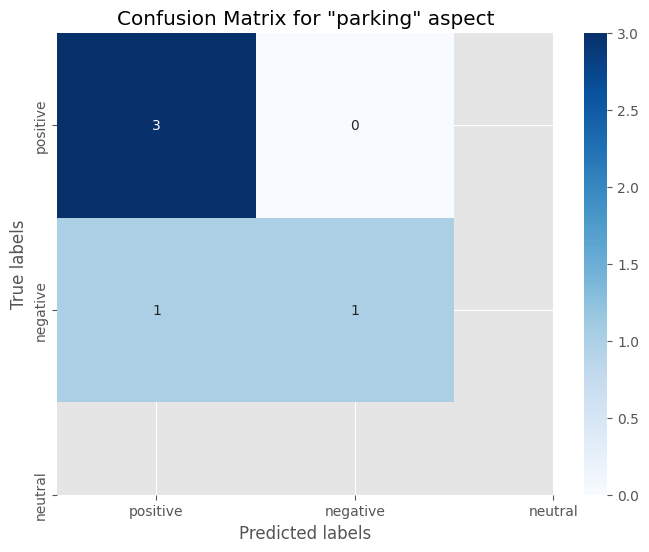

In [ ]:
converter_dict={0:'negative',1:'neutral',2:'positive'}
predicted_scores = roberta_scores_array_parking

predicted_labels = np.argmax(predicted_scores, axis=1)

predicted_labels = [converter_dict[label] for label in predicted_labels]

actual_labels = np.array(['positive', 'neutral','neutral','neutral','positive'])


cm = confusion_matrix(actual_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "parking" aspect')
plt.show()


PERFORMANCE METRICS FOR PARKING

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted')
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8
Precision: 0.85
Recall: 0.8
F1 Score: 0.7809523809523808


CONFUSION MATRIX FOR FOOD

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']


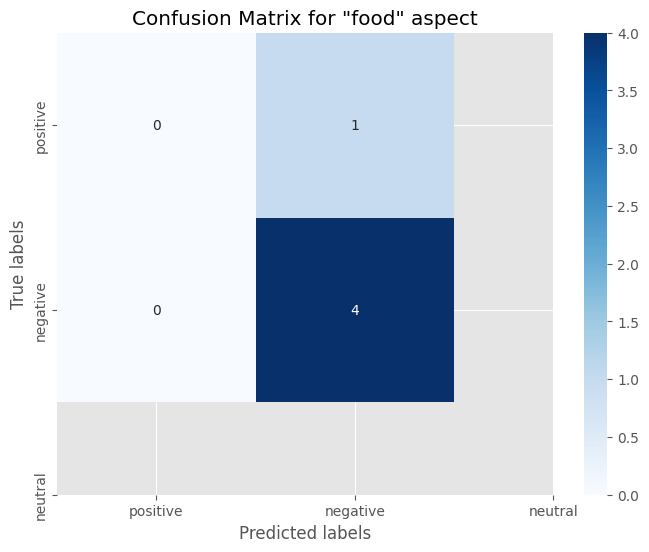

In [ ]:
converter_dict={0:'negative',1:'neutral',2:'positive'}
predicted_scores = roberta_scores_array_food

predicted_labels = np.argmax(predicted_scores, axis=1)

predicted_labels = [converter_dict[label] for label in predicted_labels]

print(predicted_labels)
actual_labels = np.array(['neutral', 'negative','neutral','neutral','neutral'])


cm = confusion_matrix(actual_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "food" aspect')
plt.show()


PERFORMANCE METRICS FOR FOOD

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted')
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8
Precision: 0.64
Recall: 0.8
F1 Score: 0.7111111111111111


CONFUSION MATRIX FOR ROOM

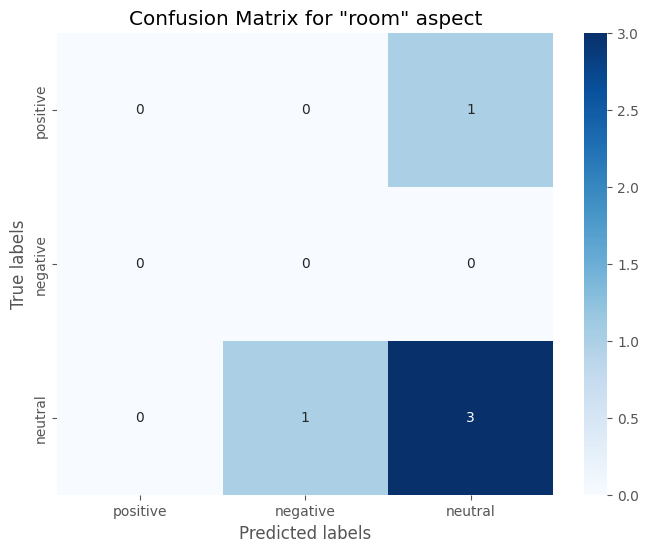

In [ ]:


converter_dict={0:'negative',1:'neutral',2:'positive'}
predicted_scores = roberta_scores_array_room

predicted_labels = np.argmax(predicted_scores, axis=1)

predicted_labels = [converter_dict[label] for label in predicted_labels]

actual_labels = np.array(['positive', 'negative','positive','positive','positive'])


cm = confusion_matrix(actual_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "room" aspect')
plt.show()


PERFORMANCE METRICS FOR ROOM

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6
Precision: 0.6
Recall: 0.6
F1 Score: 0.6


CONFUSION MATRIX FOR STAFF

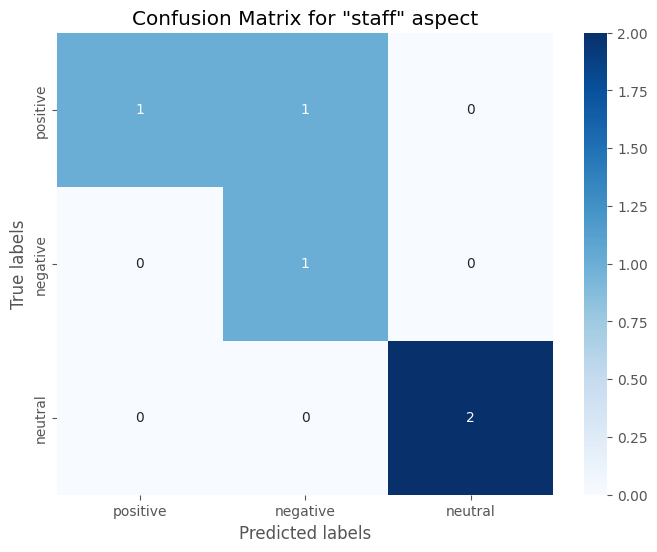

In [ ]:
converter_dict={0:'negative',1:'neutral',2:'positive'}
predicted_scores = roberta_scores_array_staff

predicted_labels = np.argmax(predicted_scores, axis=1)

predicted_labels = [converter_dict[label] for label in predicted_labels]

actual_labels = np.array(['neutral', 'negative','negative','positive','positive'])


cm = confusion_matrix(actual_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "staff" aspect')
plt.show()


PERFORMANCE METRICS FOR STAFF

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8
Precision: 0.9
Recall: 0.8
F1 Score: 0.8


CONFUSION MATRIX FOR LOCATION

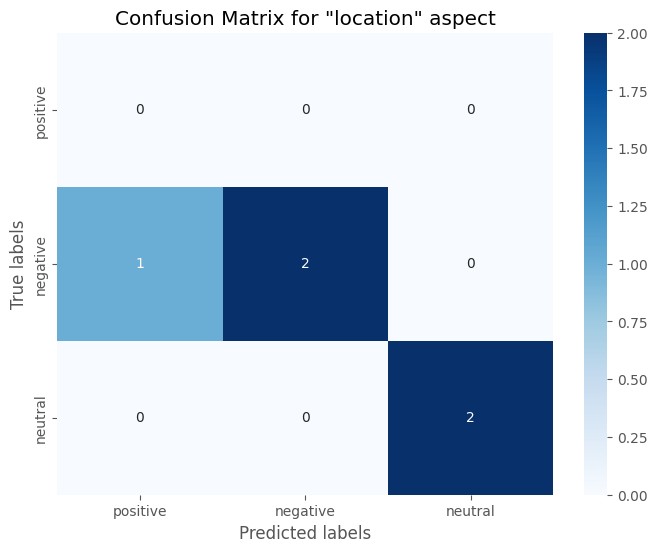

In [ ]:
converter_dict={0:'negative',1:'neutral',2:'positive'}
predicted_scores = roberta_scores_array_location

predicted_labels = np.argmax(predicted_scores, axis=1)

predicted_labels = [converter_dict[label] for label in predicted_labels]

actual_labels = np.array(['positive', 'neutral','neutral','positive','neutral'])


cm = confusion_matrix(actual_labels, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "location" aspect')
plt.show()


PERFORMANCE METRICS FOR LOCATION

In [ ]:
accuracy = accuracy_score(actual_labels, predicted_labels)

# Calculate precision, recall, and F1-score
precision = precision_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
recall = recall_score(actual_labels, predicted_labels, average='weighted',zero_division=0)
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8
Precision: 1.0
Recall: 0.8
F1 Score: 0.8800000000000001


VADER VS ROBERTA TABLE

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Review']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/10 [00:00<?, ?it/s]


Whole Review Analysis:
{'roberta_neg': 0.019478872, 'roberta_neu': 0.10407953, 'roberta_pos': 0.87644154}

Whole Review Analysis:
{'roberta_neg': 0.5876732, 'roberta_neu': 0.35850084, 'roberta_pos': 0.053825993}

Whole Review Analysis:
{'roberta_neg': 0.28925067, 'roberta_neu': 0.5487343, 'roberta_pos': 0.16201499}

Whole Review Analysis:
{'roberta_neg': 0.0038974676, 'roberta_neu': 0.033761606, 'roberta_pos': 0.9623409}

Whole Review Analysis:
{'roberta_neg': 0.073828675, 'roberta_neu': 0.30011117, 'roberta_pos': 0.6260602}

Whole Review Analysis:
{'roberta_neg': 0.018614028, 'roberta_neu': 0.23181935, 'roberta_pos': 0.74956656}

Whole Review Analysis:
{'roberta_neg': 0.0027527784, 'roberta_neu': 0.03897202, 'roberta_pos': 0.9582752}

Whole Review Analysis:
{'roberta_neg': 0.012495816, 'roberta_neu': 0.093157575, 'roberta_pos': 0.8943466}

Whole Review Analysis:
{'roberta_neg': 0.004532993, 'roberta_neu': 0.07631771, 'roberta_pos': 0.91914934}

Whole Review Analysis:
{'roberta_neg': 

In [ ]:
both = pd.DataFrame(res).T
both = both.reset_index().rename(columns={'index': 'ID'})
both = both.merge(df, how='left')

In [ ]:
both.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review,Rating
0,1,0.072,0.643,0.285,0.9747,0.019479,0.104080,0.876442,nice hotel expensive parking got good deal sta...,4
1,2,0.110,0.701,0.189,0.9787,0.587673,0.358501,0.053826,ok nothing special charge diamond member hilto...,2
2,3,0.081,0.700,0.219,0.9889,0.289251,0.548734,0.162015,nice rooms not 4* experience hotel monaco seat...,3
3,4,0.060,0.555,0.385,0.9912,0.003897,0.033762,0.962341,"unique, great stay, wonderful time hotel monac...",5
4,5,0.135,0.643,0.221,0.9797,0.073829,0.300111,0.626060,"great stay great stay, went seahawk game aweso...",5
